In [1]:
from __future__ import print_function

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn import cluster, datasets, preprocessing, metrics

from sklearn.preprocessing import StandardScaler

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [2]:
# reading the CSV file into pandas dataframe
cars_df = pd.read_csv("cars-dataset.csv") 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [5]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [6]:
cars_df.shape

(398, 8)

In [7]:
#Count, Mean, Standard Deviation, Min, Q1, Q2, Q3, Max
cars_df.describe().T

# note - horsepower is missing, indicates that the column has some non-numeric data

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [8]:
cars_df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [9]:
cars_df.isna().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [10]:
(cars_df[['hp']] == '?').sum()

hp    6
dtype: int64

In [11]:
cars_df['hp'].replace('?',np.NaN,inplace=True)

In [12]:
hp_median = cars_df['hp'].median()

In [13]:
cars_df['hp'].replace(np.NaN,hp_median,inplace=True)

In [14]:
cars_df['hp'] = cars_df.hp.astype(float)

In [15]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [16]:
cars_num_df = cars_df.drop('car name',axis=1)

### Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset

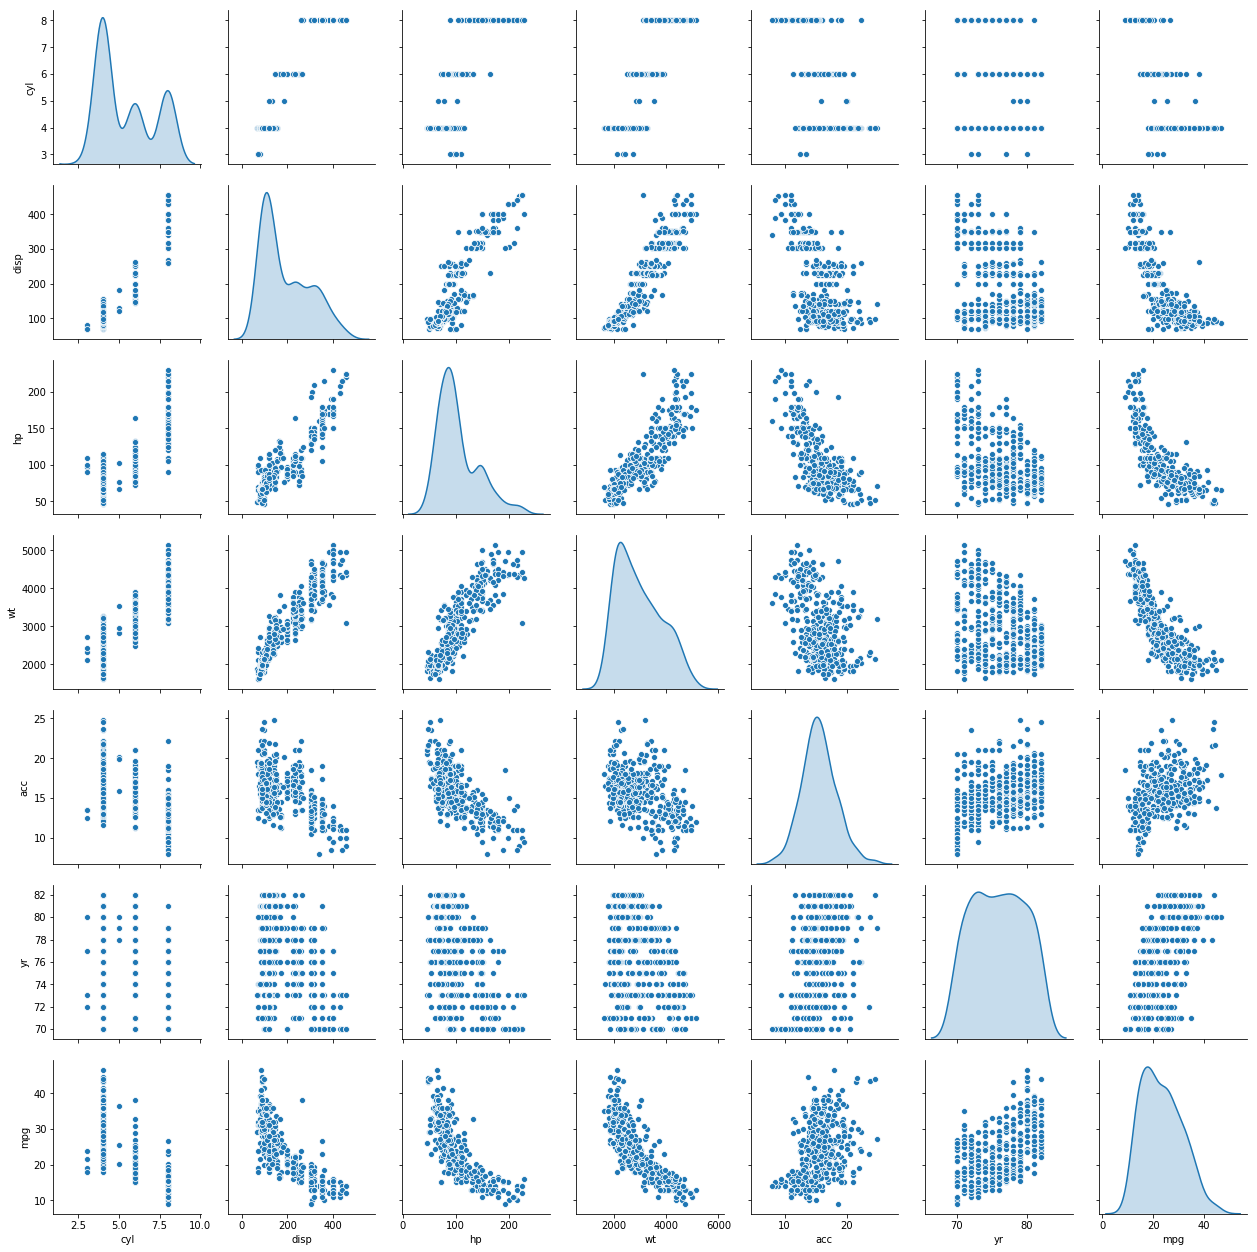

In [17]:
#sns.pairplot(cars_df, kind="reg")
sns.pairplot(cars_df, diag_kind='kde')

In [18]:
# from the pairplot it is estimated that there could be about 3 (unbalanced though) or more clusters 

In [19]:
cars_num_df['age'] = 83 - cars_num_df['yr']

In [20]:
cars_num_df.drop('yr',axis=1,inplace=True)

In [21]:
cars_num_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age
0,8,307.0,130.0,3504,12.0,18.0,13
1,8,350.0,165.0,3693,11.5,15.0,13
2,8,318.0,150.0,3436,11.0,18.0,13
3,8,304.0,150.0,3433,12.0,16.0,13
4,8,302.0,140.0,3449,10.5,17.0,13
5,8,429.0,198.0,4341,10.0,15.0,13
6,8,454.0,220.0,4354,9.0,14.0,13
7,8,440.0,215.0,4312,8.5,14.0,13
8,8,455.0,225.0,4425,10.0,14.0,13
9,8,390.0,190.0,3850,8.5,15.0,13


In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cars_num_df)
cars_sc_df = pd.DataFrame(scaled_data, index=cars_num_df.index, columns=cars_num_df.columns)
cars_sc_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,1.627426
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751,1.627426
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,1.627426
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855,1.627426
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855,1.627426
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751,1.627426


#### Outlier treatment

In [23]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

In [24]:
median = cars_sc_df.median()
std = cars_sc_df.std()
value = cars_sc_df

outliers = (value - median).abs() > 2*std

cars_sc_df[outliers] = np.nan
cars_sc_df.fillna(median, inplace=True)

cars_sc_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age
0,-0.856321,1.090604,0.673118,0.630870,-1.295498,-0.706439,1.627426
1,-0.856321,1.503514,1.589958,0.854333,-1.477038,-1.090751,1.627426
2,-0.856321,1.196232,1.197027,0.550470,-1.658577,-0.706439,1.627426
3,-0.856321,1.061796,1.197027,0.546923,-1.295498,-0.962647,1.627426
4,-0.856321,1.042591,0.935072,0.565841,-1.840117,-0.834543,1.627426
5,-0.856321,-0.431404,-0.283016,1.620492,-2.021656,-1.090751,1.627426
6,-0.856321,-0.431404,-0.283016,1.635863,-0.024722,-1.218855,1.627426
7,-0.856321,-0.431404,-0.283016,1.586204,-0.024722,-1.218855,1.627426
8,-0.856321,-0.431404,-0.283016,1.719809,-2.021656,-1.218855,1.627426
9,-0.856321,-0.431404,-0.283016,1.039961,-0.024722,-1.090751,1.627426


### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. 

In [25]:
cluster_range = range(1, 7) # expect 3 to four clusters from the pair panel visual inspection hence restricting from 1 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_sc_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1882.373955
1,2,1107.229209
2,3,907.323563
3,4,721.211785
4,5,632.537157
5,6,578.025394


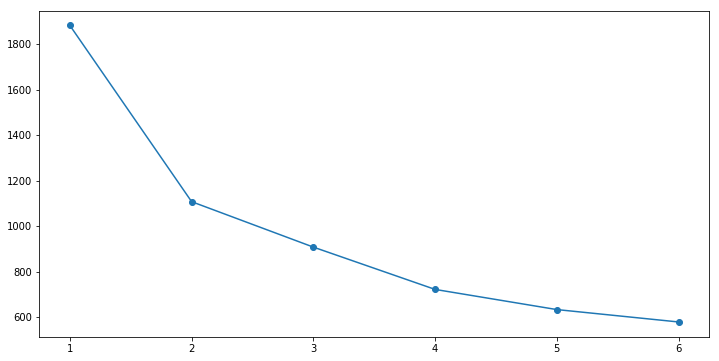

In [26]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [27]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(cars_sc_df)
cars_sc_df_copy = cars_sc_df.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [28]:
centroids = cluster.cluster_centers_
centroids

array([[-0.84430776,  0.73996283,  0.65079803,  0.9407527 , -0.9242687 ,
        -1.13061972,  0.61613042],
       [-0.87551496, -0.84300991, -0.60205954, -0.82277119,  0.24798162,
         0.26060706,  0.70911486],
       [-0.77087458, -0.73992536, -0.65841373, -0.71254038,  0.16882227,
         0.83907376, -1.09570132],
       [ 0.19480078,  0.29770559, -0.11960643,  0.33589605,  0.38676721,
        -0.55683156,  0.12199542]])

In [29]:
labels = cluster.labels_

In [30]:
df_labels = pd.DataFrame(labels)

In [31]:
df_labels[0].value_counts()

2    124
0     98
1     92
3     84
Name: 0, dtype: int64

In [32]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_sc_df) )
centroid_df

,cyl,disp,hp,wt,acc,mpg,age
0,-0.844308,0.739963,0.650798,0.940753,-0.924269,-1.130620,0.616130
1,-0.875515,-0.843010,-0.602060,-0.822771,0.247982,0.260607,0.709115
2,-0.770875,-0.739925,-0.658414,-0.712540,0.168822,0.839074,-1.095701
3,0.194801,0.297706,-0.119606,0.335896,0.386767,-0.556832,0.121995


In [33]:
prediction=cluster.predict(cars_sc_df)
cars_sc_df["group"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [34]:
cars_sc_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age,group
0,-0.856321,1.090604,0.673118,0.630870,-1.295498,-0.706439,1.627426,0
1,-0.856321,1.503514,1.589958,0.854333,-1.477038,-1.090751,1.627426,0
2,-0.856321,1.196232,1.197027,0.550470,-1.658577,-0.706439,1.627426,0
3,-0.856321,1.061796,1.197027,0.546923,-1.295498,-0.962647,1.627426,0
4,-0.856321,1.042591,0.935072,0.565841,-1.840117,-0.834543,1.627426,0
5,-0.856321,-0.431404,-0.283016,1.620492,-2.021656,-1.090751,1.627426,0
6,-0.856321,-0.431404,-0.283016,1.635863,-0.024722,-1.218855,1.627426,0
7,-0.856321,-0.431404,-0.283016,1.586204,-0.024722,-1.218855,1.627426,0
8,-0.856321,-0.431404,-0.283016,1.719809,-2.021656,-1.218855,1.627426,0
9,-0.856321,-0.431404,-0.283016,1.039961,-0.024722,-1.090751,1.627426,0


#### Converting data back from standardardized form to original form

In [35]:
cars_sc_grp_df = cars_sc_df['group'] 

In [36]:
cars_inv_array = scaler.inverse_transform(cars_sc_df_copy, copy=None)

In [37]:
cars_inv_df = pd.DataFrame(cars_inv_array, columns=['cyl','disp','hp','wt',
                                                    'acc','mpg','age'])

In [38]:
cars_grp_df = pd.concat([cars_inv_df,cars_sc_grp_df],axis=1)

#### Hierarchical clustering on the same dataset

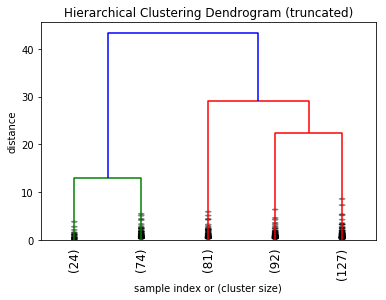

In [39]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
# dataset2_standardized = dataset1_standardized
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(cars_sc_df,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [40]:
# it is evident from the above dendogram that there are 4 clusters in the dataset

In [41]:
X = cars_sc_df

In [42]:
X = cars_sc_df.drop('group', axis = 1)
y = cars_sc_df.pop('group')

X = StandardScaler().fit_transform(X)

#### Using Principal Component Analysis (PCA) to reduce the dimensionality of the dataset so that the clusters can be viewed in 2D

In [43]:
#utilizing PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

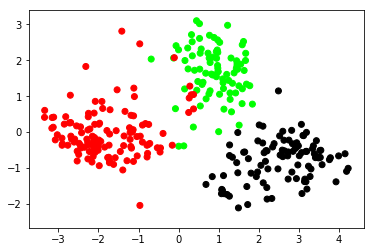

In [44]:
num_clusters=4
data2D = pca.transform(X)
centers2D = pca.transform(cluster.cluster_centers_)
labels=cluster.labels_
colors=['#000000','#FFFFFF','#FF0000','#00FF00','#0000FF']
col_map=dict(zip(set(labels),colors))
label_color = [col_map[l] for l in labels]
plt.scatter( data2D[:,0], data2D[:,1], c=label_color) # This plots the cluster points.

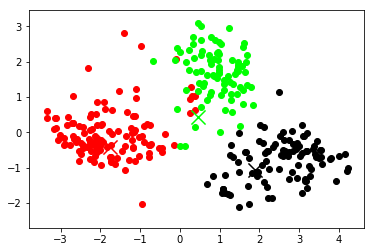

In [45]:
for i in range(num_clusters):
    plt.scatter(data2D[labels==i,0], data2D[labels==i,1], c=colors[i])
    plt.scatter(centers2D[i,0], centers2D[i,1], c=colors[i], marker='x', s=200, linewidths=2)

#### Silhouette coefficient analysis

In [46]:
#Silhouette coefficient

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.39102037976158305


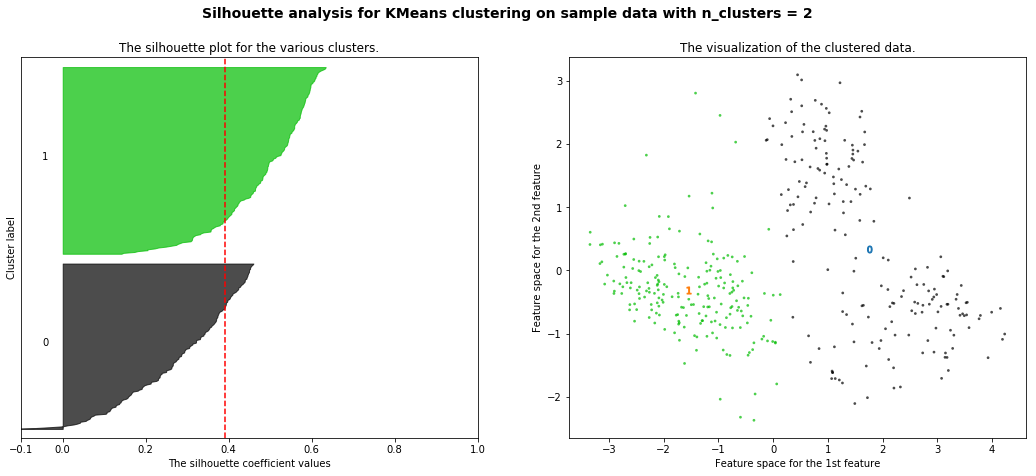

For n_clusters = 3 The average silhouette_score is : 0.4344587970028658


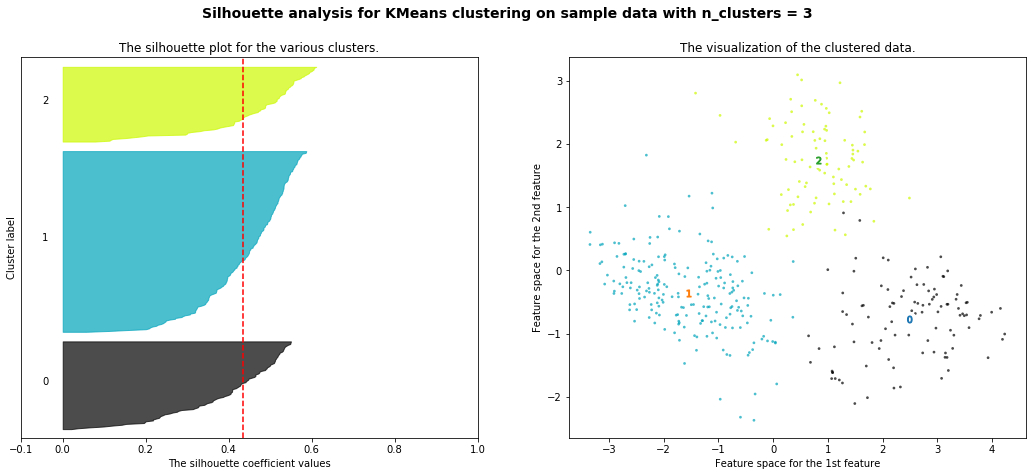

For n_clusters = 4 The average silhouette_score is : 0.35583855257329333


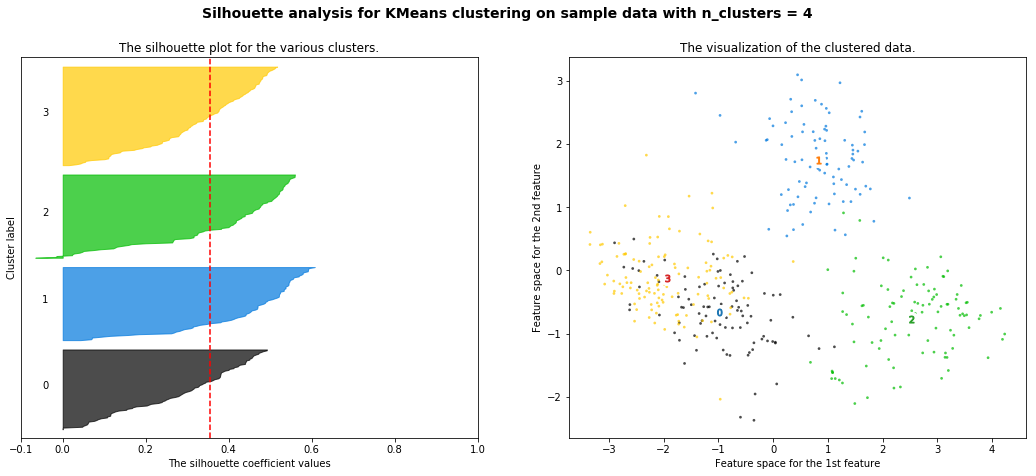

For n_clusters = 5 The average silhouette_score is : 0.356966756016054


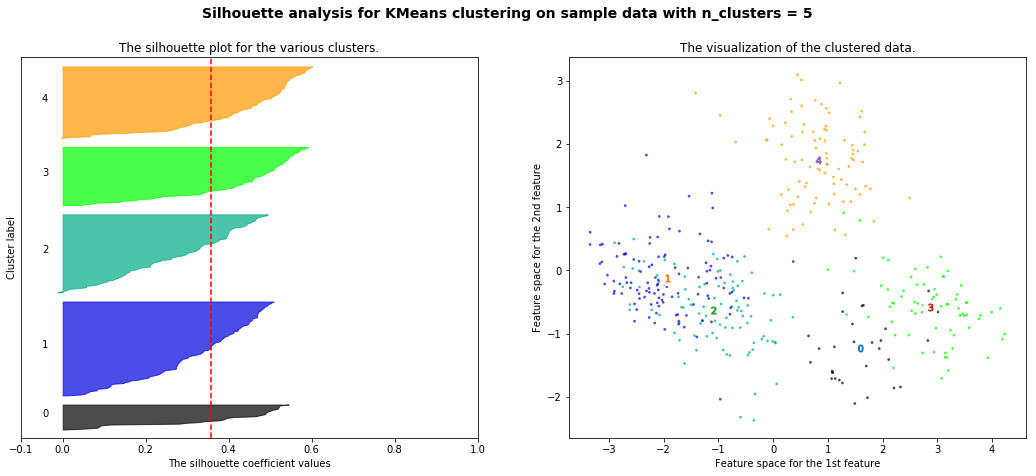

In [48]:
cluster_range = range( 2, 6 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-0.1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(data2D) + (n_clusters + 1) * 10])

  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( data2D )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(data2D, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(data2D, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(data2D[:, 0], data2D[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

In [49]:
# from the Silhoutte analysis it is evident that the optimal number of clusters are 4 since the distribution of data is
# quite balanced for each of the 4 clusters

### Identify and separate the clusters

In [50]:
# Identifying and separating the clusters

In [51]:
cars_grp0_df = cars_grp_df.query('group==0')
cars_grp0_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age,group
0,4.0,307.0,130.0,3504.0,12.0,18.0,13.0,0
1,4.0,350.0,165.0,3693.0,11.5,15.0,13.0,0
2,4.0,318.0,150.0,3436.0,11.0,18.0,13.0,0
3,4.0,304.0,150.0,3433.0,12.0,16.0,13.0,0
4,4.0,302.0,140.0,3449.0,10.5,17.0,13.0,0
5,4.0,148.5,93.5,4341.0,10.0,15.0,13.0,0
6,4.0,148.5,93.5,4354.0,15.5,14.0,13.0,0
7,4.0,148.5,93.5,4312.0,15.5,14.0,13.0,0
8,4.0,148.5,93.5,4425.0,10.0,14.0,13.0,0
9,4.0,148.5,93.5,3850.0,15.5,15.0,13.0,0


In [52]:
cars_grp1_df = cars_grp_df.query('group==1')
cars_grp1_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age,group
14,4.0,113.0,95.0,2372.0,15.0,24.0,13.0,1
18,4.0,97.0,88.0,2130.0,14.5,27.0,13.0,1
19,4.0,97.0,46.0,1835.0,20.5,26.0,13.0,1
20,4.0,110.0,87.0,2672.0,17.5,25.0,13.0,1
21,4.0,107.0,90.0,2430.0,14.5,24.0,13.0,1
22,4.0,104.0,95.0,2375.0,17.5,25.0,13.0,1
23,4.0,121.0,113.0,2234.0,12.5,26.0,13.0,1
29,4.0,97.0,88.0,2130.0,14.5,27.0,12.0,1
30,4.0,140.0,90.0,2264.0,15.5,28.0,12.0,1
31,4.0,113.0,95.0,2228.0,14.0,25.0,12.0,1


In [53]:
cars_grp2_df = cars_grp_df.query('group==2')
cars_grp2_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age,group
216,4.0,98.0,68.0,2045.0,18.5,31.5,6.0,2
217,4.0,111.0,80.0,2155.0,14.8,30.0,6.0,2
218,4.0,79.0,58.0,1825.0,18.6,36.0,6.0,2
220,4.0,85.0,70.0,1945.0,16.8,33.5,6.0,2
233,4.0,97.0,78.0,1940.0,14.5,29.0,6.0,2
236,4.0,140.0,89.0,2755.0,15.8,25.5,6.0,2
237,4.0,98.0,63.0,2051.0,17.0,30.5,6.0,2
238,4.0,98.0,83.0,2075.0,15.9,33.5,6.0,2
239,4.0,97.0,67.0,1985.0,16.4,30.0,6.0,2
240,4.0,97.0,78.0,2190.0,14.1,30.5,6.0,2


In [54]:
cars_grp3_df = cars_grp_df.query('group==3')
cars_grp3_df.head(10)

,cyl,disp,hp,wt,acc,mpg,age,group
15,6.0,198.0,95.0,2833.0,15.5,22.0,13.0,3
16,6.0,199.0,97.0,2774.0,15.5,18.0,13.0,3
17,6.0,200.0,85.0,2587.0,16.0,21.0,13.0,3
24,6.0,199.0,90.0,2648.0,15.0,21.0,13.0,3
28,4.0,304.0,93.5,2803.5,18.5,9.0,13.0,3
33,6.0,232.0,100.0,2634.0,13.0,19.0,12.0,3
34,6.0,225.0,105.0,3439.0,15.5,16.0,12.0,3
35,6.0,250.0,100.0,3329.0,15.5,17.0,12.0,3
36,6.0,250.0,88.0,3302.0,15.5,19.0,12.0,3
37,6.0,232.0,100.0,3288.0,15.5,18.0,12.0,3


In [55]:
X0 = cars_grp0_df.drop(['group','mpg'],axis = 1)
y0 = cars_grp0_df.pop('mpg')

In [56]:
X1 = cars_grp1_df.drop(['group','mpg'],axis = 1)
y1 = cars_grp1_df.pop('mpg')

In [57]:
X2 = cars_grp2_df.drop(['group','mpg'],axis = 1)
y2 = cars_grp2_df.pop('mpg')

In [58]:
X3 = cars_grp3_df.drop(['group','mpg'],axis = 1)
y3 = cars_grp3_df.pop('mpg')

### Use linear regression model on different clusters separately and print the coefficients of the models individually

In [59]:
#from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)
regression_model.fit(X0, y0)

coeff0_df = pd.DataFrame(regression_model.coef_, X0.columns, columns=['Coefficient'])  
coeff0_df.T

,cyl,disp,hp,wt,acc,age
Coefficient,0.380798,-0.002139,0.016302,0.000395,-0.186864,-0.418712


In [60]:
#from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)
regression_model.fit(X1, y1)

coeff1_df = pd.DataFrame(regression_model.coef_, X1.columns, columns=['Coefficient'])  
coeff1_df.T

,cyl,disp,hp,wt,acc,age
Coefficient,7.850109,-0.053753,-0.006765,-0.005975,-0.148565,-0.357376


In [61]:
#from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)
regression_model.fit(X2, y2)

coeff2_df = pd.DataFrame(regression_model.coef_, X2.columns, columns=['Coefficient'])  
coeff2_df.T

,cyl,disp,hp,wt,acc,age
Coefficient,0.78782,0.031708,-0.068962,-0.005807,-0.068964,-0.612721


In [62]:
#from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
#regression_model.fit(X_train, y_train)
regression_model.fit(X3, y3)

coeff3_df = pd.DataFrame(regression_model.coef_, X3.columns, columns=['Coefficient'])  
coeff3_df.T

,cyl,disp,hp,wt,acc,age
Coefficient,-0.428019,0.001999,-0.052826,-0.001045,-0.531169,-0.468416
